# Getting started with TensorFlow (Eager Mode)

**Learning Objectives**
  - Understand difference between Tensorflow's two modes: Eager Execution and Graph Execution
  - Practice defining and performing basic operations on constant Tensors
  - Use Tensorflow's automatic differentiation capability

## Introduction
**Eager Execution**

Eager mode evaluates operations immediatley and return concrete values immediately. To enable eager mode simply place `tf.enable_eager_execution()` at the top of your code. We recommend using eager execution when prototyping as it is intuitive, easier to debug, and requires less boilerplate code.

**Graph Execution**

Graph mode is TensorFlow's default execution mode (although it will change to eager with TF 2.0). In graph mode operations only produce a symbolic graph which doesn't get executed until run within the context of a tf.Session(). This style of coding is less inutitive and has more boilerplate, however it can lead to performance optimizations and is particularly suited for distributing training across multiple devices. We recommend using delayed execution for performance sensitive production code. 

In [1]:
# Ensure that we have Tensorflow 1.13.1 installed.
!pip3 freeze | grep tensorflow==1.13.1 || pip3 install tensorflow==1.13.1

    100% |████████████████████████████████| 92.5MB 13kB/s 
    100% |████████████████████████████████| 102kB 11.4MB/s 
    100% |████████████████████████████████| 51kB 12.6MB/s 
    100% |████████████████████████████████| 368kB 3.9MB/s 
    100% |████████████████████████████████| 3.2MB 483kB/s 
    100% |████████████████████████████████| 51kB 10.7MB/s 
    100% |████████████████████████████████| 2.2MB 696kB/s 
    100% |████████████████████████████████| 20.2MB 72kB/s 
    100% |████████████████████████████████| 1.2MB 1.2MB/s 
    100% |████████████████████████████████| 92kB 11.5MB/s 
    100% |████████████████████████████████| 337kB 4.4MB/s 
    100% |████████████████████████████████| 2.8MB 548kB/s 
    100% |████████████████████████████████| 583kB 2.5MB/s 
  Running setup.py bdist_wheel for absl-py ... done
  Stored in directory: /home/jupyter/.cache/pip/wheels/ee/98/38/46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
  Running setup.py bdist_wheel for gast ... done
  Stored in dire

In [2]:
import tensorflow as tf
print(tf.__version__)

1.14.0


## Eager Execution

In [3]:
tf.enable_eager_execution() 

### Adding Two Tensors 

The value of the tensor, as well as its shape and data type are printed

In [4]:
a = tf.constant(value = [5, 3, 8], dtype = tf.int32)
b = tf.constant(value = [3, -1, 2], dtype = tf.int32)
c = tf.add(x = a, y = b)
print(c)

tf.Tensor([ 8  2 10], shape=(3,), dtype=int32)


#### Overloaded Operators
We can also perform a `tf.add()` using the `+` operator. The `/,-,*` and `**` operators are similarly overloaded with the appropriate tensorflow operation.

In [5]:
c = a + b # this is equivalent to tf.add(a,b)
print(c)

tf.Tensor([ 8  2 10], shape=(3,), dtype=int32)


### NumPy Interoperability

In addition to native TF tensors, tensorflow operations can take native python types and NumPy arrays as operands. 

In [6]:
import numpy as np 

a_py = [1,2] # native python list
b_py = [3,4] # native python list

a_np = np.array(object = [1,2]) # numpy array
b_np = np.array(object = [3,4]) # numpy array

a_tf = tf.constant(value = [1,2], dtype = tf.int32) # native TF tensor
b_tf = tf.constant(value = [3,4], dtype = tf.int32) # native TF tensor

for result in [tf.add(x = a_py, y = b_py), tf.add(x = a_np, y = b_np), tf.add(x = a_tf, y = b_tf)]:
    print("Type: {}, Value: {}".format(type(result), result))

Type: <class 'tensorflow.python.framework.ops.EagerTensor'>, Value: [4 6]
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>, Value: [4 6]
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>, Value: [4 6]


You can convert a native TF tensor to a NumPy array using .numpy()

In [7]:
a_tf.numpy()

array([1, 2], dtype=int32)

### Linear Regression

Now let's use low level tensorflow operations to implement linear regression.

Later in the course you'll see abstracted ways to do this using high level TensorFlow.

#### Toy Dataset

We'll model the following function:

\begin{equation}
y= 2x + 10
\end{equation}

In [8]:
X = tf.constant(value = [1,2,3,4,5,6,7,8,9,10], dtype = tf.float32)
Y = 2 * X + 10
print("X:{}".format(X))
print("Y:{}".format(Y))

X:[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Y:[12. 14. 16. 18. 20. 22. 24. 26. 28. 30.]


#### Loss Function

Using mean squared error, our loss function is:
\begin{equation}
MSE = \frac{1}{m}\sum_{i=1}^{m}(\hat{Y}_i-Y_i)^2
\end{equation}

$\hat{Y}$ represents the vector containing our model's predictions:
\begin{equation}
\hat{Y} = w_oX + w_1
\end{equation}

#### **Exercise 1**

The function `loss_mse` below takes four arguments: the tensors $X$, $Y$ and the weights $w_0$ and $w_1$. Complete the function below to compute the Mean Square Error (MSE). Hint: [check out](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean) the `tf.reduce_mean` function.

In [9]:
def loss_mse(X, Y, w0, w1):
    return tf.reduce_mean(((w0*X+w1)-Y)**2)

#### Gradient Function

To use gradient descent we need to take the partial derivative of the loss function with respect to each of the weights. We could manually compute the derivatives, but with Tensorflow's automatic differentiation capabilities we don't have to!

During gradient descent we think of the loss as a function of the parameters $w_0$ and $w_1$. Thus, we want to compute the partial derivative with respect to these variables. The `params=[2,3]` argument tells TensorFlow to only compute derivatives with respect to the 2nd and 3rd arguments to the loss function (counting from 0, so really the 3rd and 4th).

In [10]:
# Counting from 0, the 2nd and 3rd parameter to the loss function are our weights
grad_f = tf.contrib.eager.gradients_function(f = loss_mse, params = [2, 3])

W0728 22:59:56.946027 139702127462144 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



#### Training Loop

Here we have a very simple training loop that converges. Note we are ignoring best practices like batching, creating a separate test set, and random weight initialization for the sake of simplicity.

#### **Exercise 2**

Complete the code to update the parameters $w_0$ and $w_1$ according to the gradients `d_w0` and `d_w1` and the specified learning rate.

In [11]:
STEPS = 1000
LEARNING_RATE = .02

# Initialize weights
w0 = tf.constant(value = 0.0, dtype = tf.float32)
w1 = tf.constant(value = 0.0, dtype = tf.float32)

for step in range(STEPS):
    #1. Calculate gradients
    d_w0, d_w1 = grad_f(X, Y, w0, w1) # derivatives calculated by tensorflow!

    #2. Update weights
    w0 = w0 - LEARNING_RATE * d_w0
    w1 = w1 - LEARNING_RATE * d_w1

    #3. Periodically print MSE
    if step % 100 == 0:
        print("STEP: {} MSE: {}".format(step,loss_mse(X, Y, w0, w1)))

# Print final MSE and weights
print("STEP: {} MSE: {}".format(STEPS,loss_mse(X, Y, w0, w1)))
print("w0:{}".format(round(float(w0), 4)))
print("w1:{}".format(round(float(w1), 4)))

W0728 23:04:05.603077 139702127462144 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


STEP: 0 MSE: 167.6111297607422
STEP: 100 MSE: 3.5321757793426514
STEP: 200 MSE: 0.6537718176841736
STEP: 300 MSE: 0.12100745737552643
STEP: 400 MSE: 0.022397063672542572
STEP: 500 MSE: 0.004145540297031403
STEP: 600 MSE: 0.0007674093940295279
STEP: 700 MSE: 0.00014202017337083817
STEP: 800 MSE: 2.628635775181465e-05
STEP: 900 MSE: 4.86889211970265e-06
STEP: 1000 MSE: 9.178326081382693e-07
w0:2.0003
w1:9.9979


## Bonus

Try modelling a non-linear function such as: $y=xe^{-x^2}$

Hint: Creating more training data will help. Also, you will need to build non-linear features.

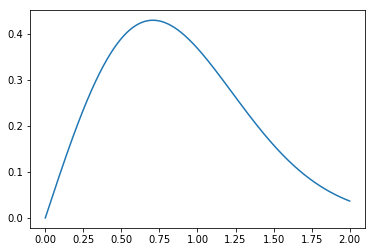

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

X = tf.constant(value = np.linspace(0,2,1000), dtype = tf.float32)
Y = X*np.exp(-X**2)
plt.plot(X, Y)

In [28]:
def make_features(X):
    features = [X]
    features.append(tf.ones_like(X))  # Bias.
    features.append(tf.square(X))
    return tf.stack(features, axis=1)

def make_weights(n_weights):
    W = [tf.constant(value = 0.0, dtype = tf.float32) for _ in range(n_weights)]
    return tf.expand_dims(tf.stack(W),-1)

def predict(X, W):
    Y_hat = tf.matmul(X, W)
    return tf.squeeze(Y_hat, axis=-1)

def loss_mse(X, Y, W):
    Y_hat = predict(X, W)
    return tf.reduce_mean(input_tensor = (Y_hat - Y)**2)

X = tf.constant(value = np.linspace(0,2,1000), dtype = tf.float32)
Y = X*np.exp(-X**2)

grad_f = tf.contrib.eager.gradients_function(f = loss_mse, params=[2])

STEP: 2000 MSE: 0.0033744806423783302


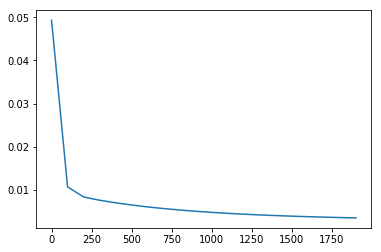

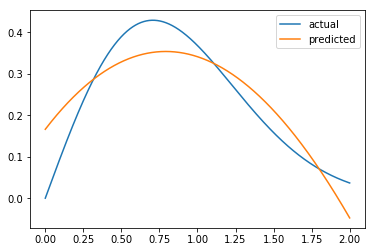

In [29]:
STEPS = 2000
LEARNING_RATE = .02

# Weights/features.
Xf = make_features(X)
# Xf = Xf[:,0:2]  # Linear features only.
W = make_weights(Xf.get_shape()[1].value)

# For plotting
steps = []
losses = []

plt.figure()
for step in range(STEPS):
    #1. Calculate gradients
    dW = grad_f(Xf, Y, W)[0]
    #2. Update weights
    W -= dW * LEARNING_RATE
    #3. Periodically print MSE
    if step % 100 == 0:
        loss = loss_mse(Xf, Y, W)
        steps.append(step)
        losses.append(loss)
        plt.clf()
        plt.plot(steps, losses)
# Print final MSE and weights
print("STEP: {} MSE: {}".format(STEPS,loss_mse(Xf, Y, W)))

# Plot results
plt.figure()
plt.plot(X, Y, label='actual')
plt.plot(X, predict(Xf, W), label='predicted')
plt.legend()

Copyright 2019 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License